# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [140]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [141]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [142]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [143]:
df_train.shape

(15223, 52)

In [144]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [145]:
df_test.shape

(14910, 52)

In [146]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [147]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [148]:
# соединяем строки df_train и df_test
# reset_index - все id идут по очереди, то есть id первой строки df_test, не 0, а следующий за id последней строки df_train
df = df_test.append(df_train).reset_index(drop=True)

In [149]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего строки.


Давайте выведем эти значения для каждого столбца

In [151]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Ученая степень', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Высшее', 'Среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'Недвижимость', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Наука', 'Развлечения/Искусство', 'Сборочные производства', 'Страхование', 'Информационные технологии', 'Другие сферы', 'Банк/Финансы', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Здравоохранение', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Торговля', 'Государственная служба', 'Образование', 'Энергетика', 'Салоны красоты и здоровья', 'Подбор персонала', 'Туризм', 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Маркетинг'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [152]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [153]:
# Пропуски есть. Можно заменить их на нейтральное значение, которое не будет влиять на результаты выборки, например, "-1".

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [154]:
# Категориальные признаки тоже есть. 
# Не самые важные для выборки (или дублирующиеся) признаки можно удалить
# Остальные следует выразить в числовой форме, labelencoding, onehotenconding

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [155]:
# 'AGREEMENT_RK' - уникальный номер клиента, он нам не нужен для статистики, удаляем его
# df = df.drop(['AGREEMENT_RK'], axis=1)
# del(df_output['AGREEMENT_RK'])

def del_rk(df):
    del(df['AGREEMENT_RK'])
    return df

In [156]:
# меняем '.' на  ',' в столбцах

def replace_comma(df, num_columns):
    for num in num_columns:
        df[num] = df[num].map(lambda x: x.replace(',', '.')).astype('float')
    return df

In [157]:
# пропуски заполняем как "-1"
# ещё можно заполнить медианой
def fill_na(df):
    
    df = df.fillna(-1)
        
    # удалить строки, где встречаются NaN
    # плохой вариант, в разных столбцах строки с NaN разные => остаётся всего 555 строк без NaN
    #nan_cols = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED']
    #for col in nan_cols:
    #    df = df[~df[col].isnull()]
    
    # удалить столбцы с NaN
    #nan_cols = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED']
    #for col in nan_cols:
    #    del(df[col])
    
    return df

In [158]:
# кодируем категориальные признаки

def change_categoricals(df):
    
    categoricals = ['sample', 'EDUCATION', 'FAMILY_INCOME', 'MARITAL_STATUS',
                    'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
                    'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE',
                    'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']
    
    # пока что просто удаляем все категориальные столбцы
    #for col in df.columns:
     #   if str(df[col].dtype) == 'object':
      #      #if (col != 'sample') & (col !='EDUCATION') & (col !='FAMILY_INCOME') & (col !='FAMILY_INCOME'):
       #     #if (col != 'sample'):
        #    if (col not in categoricals):
         #       del(df[col])
    
    # повторяет адрес проживания, можно и удалить
    df = df.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
    
    df.loc[:, 'EDUCATION'] = df.loc[:, 'EDUCATION'].replace({
        'Неполное среднее': 0,
        'Среднее': 1,
        'Среднее специальное': 2,
        'Неоконченное высшее': 3,
        'Высшее': 4,
        'Два и более высших образования': 5,
        'Ученая степень': 6,
    })
    
    df.loc[:, 'FAMILY_INCOME'] = df.loc[:, 'FAMILY_INCOME'].replace({
        'до 5000 руб.': 0,
        'от 5000 до 10000 руб.': 1,
        'от 10000 до 20000 руб.': 2,
        'от 20000 до 50000 руб.': 3,
        'свыше 50000 руб.': 4
    })
    
    df = pd.get_dummies(df, columns=['MARITAL_STATUS',
                    'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
                    'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE',
                    'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    return df

In [159]:
df2 = df.copy()
df2 =  fill_na(df2)
df2 = change_categoricals(df2)

df2.head()
#df2.shape

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,59909969,0,30,1,0,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,1,2,...,0,0,0,0,0,0,1,0,0,0
2,59911223,0,35,1,0,0,1,0,1,3,...,0,0,0,0,0,0,0,1,0,0
3,59911322,0,22,1,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
4,59911438,0,27,1,0,1,2,2,4,3,...,1,0,0,0,0,0,0,0,0,0


In [160]:
def preproc_data(df_input):
    df_output = df_input.copy()

    df_output = del_rk(df_output)
    num_cols = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    df_output = replace_comma(df_output, num_cols)
    df_output =  fill_na(df_output)
    df_output = change_categoricals(df_output)
    
    return df_output

In [161]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [162]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,PERSONAL_INCOME,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,2,2,7000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,1,2,4100.0,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,1,3,40000.0,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,1,3,20000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,4,3,17000.0,...,1,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получиться:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = df_train_preproc.drop(['TARGET'], axis = 1)
X_test = df_test_preproc.drop(['TARGET'], axis = 1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [165]:
X_test.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,PERSONAL_INCOME,REG_FACT_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,30,1,0,1,1,1,2,2,7000.0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,0,1,1,0,0,1,2,4100.0,1,...,0,0,0,0,0,0,1,0,0,0
2,35,1,0,0,1,0,1,3,40000.0,1,...,0,0,0,0,0,0,0,1,0,0
3,22,1,0,0,0,0,1,3,20000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,27,1,0,1,2,2,4,3,17000.0,1,...,1,0,0,0,0,0,0,0,0,0


#### Задание 5. Обучение и оценка качества разных моделей

In [166]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
X_test.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,PERSONAL_INCOME,REG_FACT_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
21229,26,1,0,0,0,0,4,4,34000.0,1,...,1,0,0,0,0,0,0,0,0,0
19162,59,0,1,0,2,0,4,3,35000.0,0,...,0,0,0,0,0,0,0,0,1,0
17233,31,1,0,1,1,1,1,3,8000.0,0,...,1,0,0,0,0,0,0,0,0,0
21806,24,1,0,1,0,0,1,2,12000.0,0,...,0,0,0,0,0,0,1,0,0,0
18209,29,1,0,1,2,2,1,1,4330.0,1,...,0,1,0,0,0,0,0,0,0,0


In [168]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [169]:
#lr = LogisticRegression(C=1.0, fit_intercept=True) - эти параметры и так по умолчанию
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

In [171]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc = rfc.predict_proba(X_test)

In [172]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
accuracy_lr = accuracy_score(y_test, predict_lr)
precision_lr = precision_score(y_test, predict_lr)
recall_lr = recall_score(y_test, predict_lr)

accuracy_dtc = accuracy_score(y_test, predict_dtc)
precision_dtc = precision_score(y_test, predict_dtc)
recall_dtc = recall_score(y_test, predict_dtc)

accuracy_rfc = accuracy_score(y_test, predict_rfc)
precision_rfc = precision_score(y_test, predict_rfc)
recall_rfc = recall_score(y_test, predict_rfc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [173]:
print('accuracy_lr', accuracy_lr)
print('precision_lr', precision_lr)
print('recall_lr', recall_lr)
print('\n')
print('accuracy_dtc', accuracy_dtc)
print('precision_dtc', precision_dtc)
print('recall_dtc', recall_dtc)
print('\n')
print('accuracy_rfc', accuracy_rfc)
print('precision_rfc', precision_rfc)
print('recall_rfc', recall_rfc)

accuracy_lr 0.8776001751696957
precision_lr 0.25
recall_lr 0.0036036036036036037


accuracy_dtc 0.7948324939785417
precision_dtc 0.14097744360902256
recall_dtc 0.13513513513513514


accuracy_rfc 0.8784760236479089
precision_rfc 0.0
recall_rfc 0.0


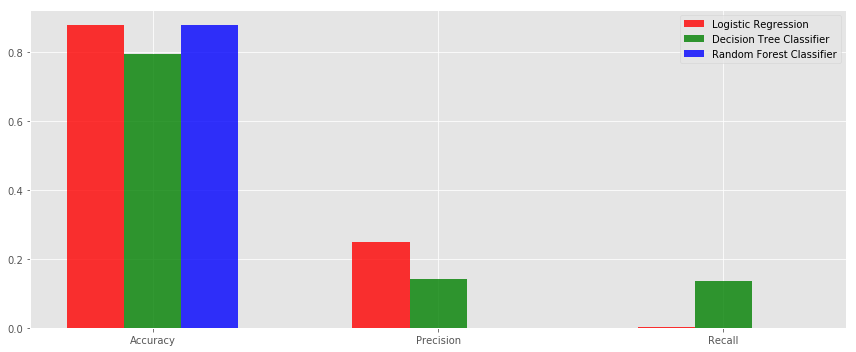

In [174]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает


## Your Code Here
lr_ = (accuracy_lr, precision_lr, recall_lr)
dtc_ = (accuracy_dtc, precision_dtc, recall_dtc)
rfc_ = (accuracy_rfc, precision_rfc, recall_rfc)

accuracy_ = (accuracy_lr, accuracy_dtc, accuracy_rfc)
precision_ = (precision_lr, precision_dtc, precision_rfc)
recall_ = (recall_lr, recall_dtc, recall_rfc)

fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.2
opacity = 0.8
metrics = ('Accuracy', 'Precision', 'Recall')
#algorithms = ('Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier')

plot1 = plt.bar(
    index, 
    lr_,
    bar_width,
    alpha=opacity,
    color = 'r',
    label = 'Logistic Regression')

plot2 = plt.bar(
    index+bar_width, 
    dtc_,
    bar_width,
    alpha=opacity,
    color = 'g',
    label = 'Decision Tree Classifier')

plot3 = plt.bar(
    index+bar_width*2, 
    rfc_,
    bar_width,
    alpha=opacity,
    color = 'b',
    label = 'Random Forest Classifier')

#plt.xlabel('Metrics')
#plt.ylabel('Algorithms')

plt.xticks(index+bar_width, metrics)
plt.legend()

plt.tight_layout()
plt.show()

In [175]:
print(predict_rfc)

[0 0 0 ... 0 0 0]


Random Forest Classifier ROC-AUC = 0.6602173210099431
Decision Tree Classifier ROC-AUC = 0.5106134299803292
Logistic Regression ROC-AUC = 0.6434673457106159


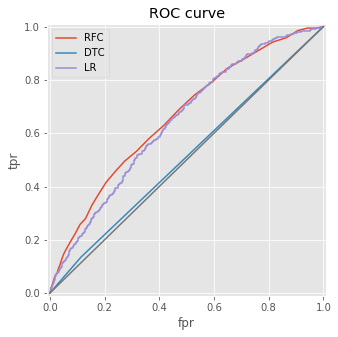

In [176]:
# Построить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_proba_rfc[:, 1])
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_proba_dtc[:, 1])
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_proba_lr[:, 1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_rfc, tpr_rfc, label='RFC')
plt.plot(fpr_dtc, tpr_dtc, label='DTC')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print('Random Forest Classifier ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_rfc[:,1])))
print('Decision Tree Classifier ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_dtc[:,1])))
print('Logistic Regression ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_lr[:,1])))

In [187]:
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.model_selection import cross_val_score
lr_cross = LogisticRegression()
dtc_cross = DecisionTreeClassifier()
rfc_cross = RandomForestClassifier()

cross_val_score = cross_val_score(
    #rfc_cross,
    lr_cross,
    #dtc_cross,
    X,
    y,
    scoring = 'roc_auc',
    cv=10
)

cross_val_score.mean()

## Your Code Here

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6416375467167239

In [188]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here

# по итогам кросс-валидации ROC-AUC выше у Logistic Regression
# берём его

X_test = df_test_preproc.drop(['TARGET'], axis = 1)
y_test = df_test_preproc['TARGET']
test_predict = lr.predict(X_test)
test_predict_proba = lr.predict_proba(X_test)
#test_predict_proba

print(accuracy_score(y_test, test_predict))

0.8819584171696848


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Logistic Regression ROC-AUC = 0.6235772904906643


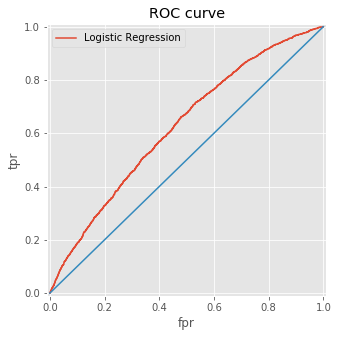

In [191]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, test_predict_proba[:, 1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print('Logistic Regression ROC-AUC = {}'.format(roc_auc_score(y_test, test_predict_proba[:,1])))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [190]:
### И далее ;)